In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adadelta

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
# Function to plot PCA and t-SNE embeddings side-by-side
def plotfun(pca_embedding, tsne_embedding, y_data, labels, title, fname=None):

    if fname is not None:
        import matplotlib
        matplotlib.use('Agg')
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    for i in labels:
        ax.scatter(pca_embedding[y_data == i, 0], pca_embedding[y_data == i, 1], pca_embedding[y_data == i, 2], label=i)
    ax.legend()
    ax.set_title(title + ' PCA Embedding')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')

    ax = fig.add_subplot(122, projection='3d')
    for i in labels:
        ax.scatter(tsne_embedding[y_data == i, 0], tsne_embedding[y_data == i, 1], tsne_embedding[y_data == i, 2], label=i)
    ax.legend()
    ax.set_title(title + ' t-SNE Embedding')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')

    if fname is None:
        plt.show()
    else:
        plt.savefig(fname)
        plt.close()

In [3]:
# Function to get and prepare the MNIST dataset
def get_MNIST_data(number_of_test_samples):
    ############
    # Prepare the data
    ############

    # Load the MNIST dataset
    mnist_dataset = mnist.load_data()
    (trainset, testset) = (mnist_dataset[0], mnist_dataset[1])
    (X_train, y_train) = trainset
    (X_test, y_test) = testset

    # Preprocess data (convert to float and scale to between 0 and 1)
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Flatten data (turn images into vectors)
    X_train_fl = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
    X_test_fl = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

    # Take a random subset of the data
    rndperm = np.random.permutation(X_test.shape[0])
    if number_of_test_samples > 0:
        X_test = X_test[rndperm[:number_of_test_samples],]
        X_test_fl = X_test_fl[rndperm[:number_of_test_samples],]
        y_test = y_test[rndperm[:number_of_test_samples],]

    target_ids = np.unique(y_train)

    return X_train, X_train_fl, y_train, X_test, X_test_fl, y_test, target_ids

In [4]:
# Function to embed data using t-SNE and PCA
def get_tsne_pca(data_fl, n_components=3, tsne_perplexity=25):
    # PCA
    pca = PCA(n_components=n_components)
    pca_embedding = pca.fit_transform(data_fl)
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    # t-SNE
    tsne = TSNE(n_components=n_components, perplexity=tsne_perplexity)
    tsne_embedding = tsne.fit_transform(data_fl)
    print('t-SNE embedding KL Divergence: {}'.format(tsne.kl_divergence_))

    return pca_embedding, tsne_embedding

In [5]:
if __name__ == "__main__":

    number_of_test_samples = 500  
    tsne_perplexity = 25

    X_train, X_train_fl, y_train, X_test, X_test_fl, y_test, target_ids = get_MNIST_data(number_of_test_samples)

Explained variation per principal component: [0.10585482 0.07682193 0.06769522]
t-SNE embedding KL Divergence: 0.7018738985061646


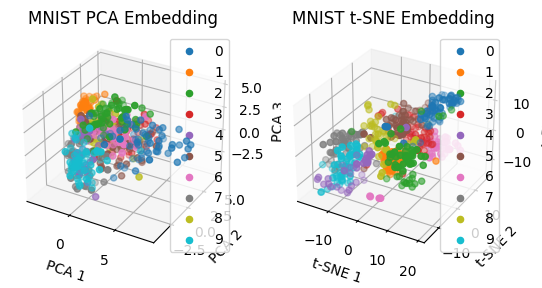

In [6]:
    ############################################################
    # Part 2.1.1 - Plot PCA and t-SNE embeddings of original MNIST data
    ############################################################

    # Embed the dataset passed to it using PCA and t-SNE (using sklearn)
    pca_embedding, tsne_embedding = get_tsne_pca(X_test_fl, n_components=3, tsne_perplexity=tsne_perplexity)

    # Plot the embeddings using the labels for colouring
    plotfun(pca_embedding, tsne_embedding, y_test, target_ids, 'MNIST')

In [7]:
############################################################
# Part 2.1.2 - Plot PCA and t-SNE embeddings of SAE encodings
############################################################

# Define your autoencoder model here (example structure)
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
ae_model = Model(input_img, decoded)
    
# Create the encoder model
encoder_model = Model(input_img, encoded)

In [8]:
# Compile and train the autoencoder model
ae_model.compile(optimizer='adam', loss='binary_crossentropy')
batch_size = 256
epochs = 50
history = ae_model.fit(x=X_train_fl, y=X_train_fl, batch_size=batch_size, epochs=epochs,
                            validation_split=0.2, shuffle=True)

Epoch 1/50
188/188 [==============================] - 2s 7ms/step - loss: 0.2928 - val_loss: 0.2012
Epoch 2/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1806 - val_loss: 0.1639
Epoch 3/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1540 - val_loss: 0.1445
Epoch 4/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1381 - val_loss: 0.1319
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1272 - val_loss: 0.1225
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1190 - val_loss: 0.1157
Epoch 7/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1129 - val_loss: 0.1106
Epoch 8/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1083 - val_loss: 0.1067
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1047 - val_loss: 0.1037
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1018 - val_loss: 0.1014

16/16 [==============================] - 0s 2ms/step
Explained variation per principal component: [0.34315467 0.0874704  0.0667486 ]
t-SNE embedding KL Divergence: 0.7660088539123535


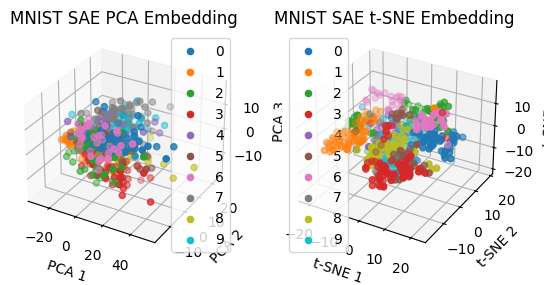

In [9]:
# Use the encoder model to get the encoded representations
encoded_states = encoder_model.predict(X_test_fl)

# Plot PCA and t-SNE embeddings of the SAE encodings
pca_result, tsne_result = get_tsne_pca(encoded_states, n_components=3, tsne_perplexity=tsne_perplexity)
plotfun(pca_result, tsne_result, y_test, target_ids, 'MNIST SAE')